# Effects of User Type Characteristics on Bike Usage
## by Xuan Kuang

## Investigation Overview

> In this investigation, I want to look at the user type characteristics of San Francisco Bay Area in 2018 on the bike usage. The main focus was on the start time (month, weekday/weekend, hour), when bikes usage were high in demand, and duration which how long users spent on per rid.

## Dataset Overview

> This document explores the Ford GoBike data with approximately 1,860,000 bike rides records from 2018/01 - 2018/12. The attributes included the trip start/end time, as well as additional measurements such as longitude/latitude of start stations. 11 data points were removed from the analysis due to location of start station is outside of San Francisco Bay Area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bikes_clean=pd.read_csv('bikes_clean.csv')

In [3]:
#change data type to category for user_type with order
cat_user=['Subscriber','Customer']
bikes_clean['user_type'] = pd.Categorical(bikes_clean['user_type'], ordered=True, categories=cat_user)

#change data type to category for month with order
cat_month = ['Jan', 'Feb', 'Mar', 'Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
bikes_clean['month'] = pd.Categorical(bikes_clean['month'], ordered=True, categories=cat_month)

#change data type to category for day of week with order
cat_day = ['Mon','Tue','Wed','Thur','Fri','Sat','Sun']
bikes_clean['day'] = pd.Categorical(bikes_clean['day'], ordered=True, categories=cat_day)

## Proportion of Bike Usage by User Type

> There are 85% of the bike usage in 2018 are Subscriber, which is over 5 times of Customer at 15%. For long term or frequently used riders, annual/month pass have competitive price per ride compared to non-subcribed users.

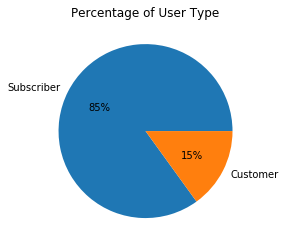

In [4]:
#plot the pie chart for user type
(bikes_clean.user_type.value_counts()).plot(kind = 'pie',autopct='%.0f%%')
plt.title('Percentage of User Type');
plt.ylabel('');

## Monthly Bike Usage by User Type

> For both user types, the number of bike usage increased from 2018/01 to 2018/07, and started with a decreased trend afterwards.
> 
> The number of bike usage by subscribers went up from about 80k to about 170k. It increased 90k rides, over 1 times compared to January. While there is only a little changes for Customer compared to Subscriber, which went from 10k to about 30k with only 20k rides. But compared to January, the number of rides increased about 2 times.
> 
> We may consider the difference on demand between months is related to climate.People may usually choose other transportation methods other than bike during the rainy or cold weather.

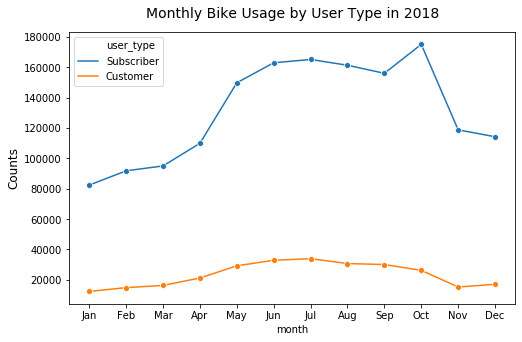

In [5]:
#create sub dataframe for ride counts group by month and user type
bikes_clean_month_user=bikes_clean.groupby(['month','user_type']).count().reset_index()[['month','user_type','day']]

#plot line chart for counts of ride based on month and user type
plt.figure(figsize = [8, 5])
sb.lineplot(x='month',y='day',hue='user_type',data=bikes_clean_month_user, marker='o');
plt.title("Monthly Bike Usage by User Type in 2018", fontsize=14, y=1.03);
plt.ylabel("Counts", fontsize=12);

## Hourly Bike Usage on Weekday/Weekend

> Peak hours of bike rides are 7 am-9 am and 4 pm-6 pm. And there are more people taking bike rides on weekdays compared to weekends.
> 
> Peak hours is not observed on weekends. Users might ride bikes on weekends for leisure purpose. Thus, there is no clear peak hours.
> 
> It is most probably that the main purpose for users to ride bikes is commuting. This can explain why there is higher demand during the rush hours at weekdays.

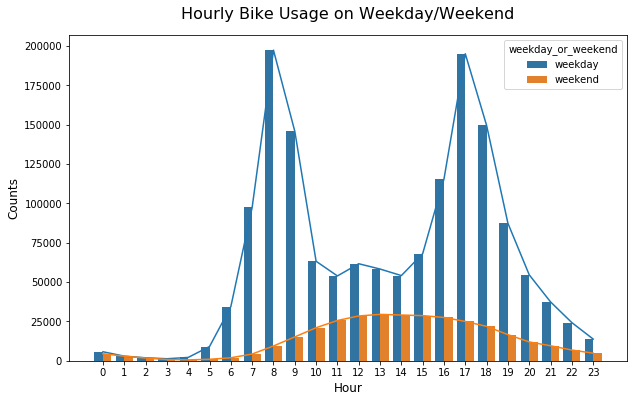

In [6]:
#create sub df for plot
#ride counts grouped by hour and weekday/weekend
bikes_clean_hour_day=bikes_clean.groupby(['hour','weekday_or_weekend']).count().reset_index()[['hour','weekday_or_weekend','day']]

#plot bar and line chart for counts of ride based on start hour and weekday/weekend
plt.figure(figsize = [10, 6])
sb.countplot(x='hour',hue='weekday_or_weekend',data=bikes_clean)
sb.lineplot(x='hour',y='day',hue='weekday_or_weekend',data=bikes_clean_hour_day,legend=False);
plt.title("Hourly Bike Usage on Weekday/Weekend", fontsize=16, y=1.03);
plt.xlabel("Hour", fontsize=12);
plt.ylabel("Counts", fontsize=12);

## Duration per Ride by User Type

> Below box plot shows the user patterns in the duration of weekday/weekend usage.
> 
> With the time limit 45mins per ride for subscribers, the duration is much shorter than customers (30mins per ride).It was at the median around 8 mins. It is likely that subscribers are mainly the citizens lived in that region, so they will use bikes more on commuting rather than taking longer ride for visiting.
> 
> On the other hand, customers, who is maily the visitors, spent more time on single bike ride, at the median about 15 mins. It is likely that they are taking more advantage of bike sharing system for leisure purpose. Visitors usually enjoy their trips, and will not rush to destinations like the commuters do.

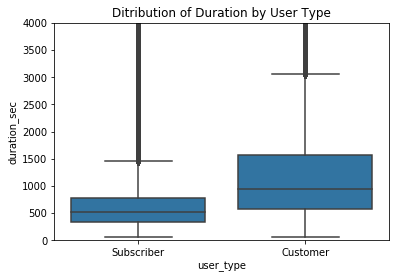

In [7]:
#plot box plot with duration under 4000s by user type
default_color = sb.color_palette()[0]
sb.boxplot(data = bikes_clean, x = 'user_type', y = 'duration_sec',color = default_color);
plt.title('Ditribution of Duration by User Type')
plt.ylim([0,4000]);

## Hourly Bike Usage by Day of Week and User Type

- Subscribers use the bike sharing system mainly on weekdays:
  - weekdays: Most bike rides happened around 7am-9am and 4pm-6pm
  - weekends: The number of bike rides dropped significantly, and no peak hours observed
- Customers use the bike sharing system more often on weekends:
  - weekdays: most bike rides happened around 8am-9am and 4pm-6pm, and there are more usage around 4pm-6pm compared to 8am-9am. However, the number of usage is much less than subscribers in the same period.
  - weekends: most bike rides happened between 10am - 6pm, and the number of usage is significantly higher compared to weekdays and also much more higher than the subscribers in the same period.

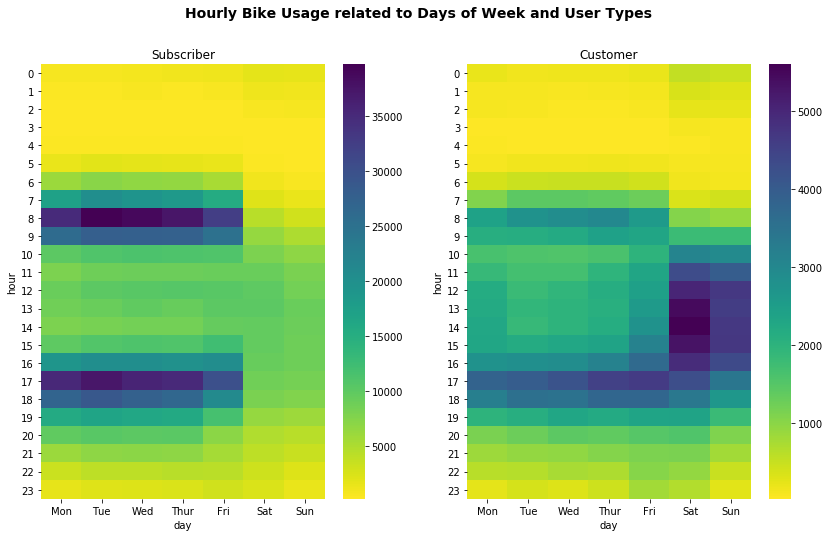

In [8]:
#create sub data frame for user type subscriber
bikes_clean_subscriber=bikes_clean.query('user_type == "Subscriber"').groupby(["hour", "day"])["duration_sec"].count().reset_index()
bikes_clean_subscriber=bikes_clean_subscriber.pivot("hour", "day", "duration_sec")

#create sub data frame for user type customer
bikes_clean_customer=bikes_clean.query('user_type == "Customer"').groupby(["hour", "day"])["duration_sec"].count().reset_index()
bikes_clean_customer=bikes_clean_customer.pivot("hour", "day", "duration_sec")

#set figure size and title
plt.figure(figsize=(14,8));
plt.suptitle('Hourly Bike Usage related to Days of Week and User Types', fontsize=14, fontweight='semibold')

# heatmap for subscribers
plt.subplot(1, 2, 1);
sb.heatmap(bikes_clean_subscriber,cmap = 'viridis_r');
plt.title("Subscriber");
plt.yticks(rotation=0);

# heatmap for customers
plt.subplot(1, 2, 2);
sb.heatmap(bikes_clean_customer,cmap = 'viridis_r');
plt.title("Customer");
plt.yticks(rotation=0);

## Summary

> There are two types of clients using the bike sharing system: subscribers who are mainly daily commuters having short trips around 8 mins, using bike on weekdays at 8-9am and 5-6pm. On the other hand, customers usually are tourists or occassional riders who use the system mainly on weekends for longer ride around 15 mins to visit the Bay Area.
> 
> And for both of the user types, the bike share system was used more often around summertime (May-October) with a clear drop afterwards, most probably due to the climate.

In [ ]:
!jupyter nbconvert slide_deck_bikes.ipynb --to slides --post serve --template output_toggle